# Logistic Regression Model Video Classifier

This notebook uses Logistic Regression to predict a Youtube category based off of 
the title. We will run this on three inputs. Filtered titles, filtered and normalized titles, and
filtered titles with no stop words

In [1]:
import pandas as pd
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix


import string

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load data and get Data

Here, we want to load the csv file and separate each column. 

In [2]:
df_dataset = pd.read_csv('./output/US_count_vectorizer_dataset.csv')
df_dataset.head()

,title,filter_title,filter_title_no_stops,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage,want talk marriage,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency last week tonight with jo...,trump presidency last week tonight john oliver...,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele pons,Comedy
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics real or fake,nickelback lyrics real fake,Entertainment
4,I Dare You: GOING BALD!?,i dare you going bald,dare going bald,Entertainment


1. df_x are regular, filtered title
2. df_x2 are filtered title that does not contain stop words
3. df_y are video categories
4. target_names are all the possible categories

In [3]:
df_x = df_dataset['filter_title']
df_x2 = df_dataset['filter_title_no_stops']
df_y = df_dataset['category_id']
target_names = list(df_dataset['category_id'].unique())

### Split the data

We want to split the data here where 80 percent are reserved for training and 20 percent is reserved for testing

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=117)

x_train2, x_test2 = train_test_split(df_x2, test_size=0.2, random_state=117)

# replace NaN with spaces so count vectorizer can work
x_train2 = x_train2.fillna(' ')
x_test2 = x_test2.fillna(' ')


### Tokenize words

Here, we want to essentially want to convert our words in the title here into 1 and 0s
so the Logistic Regression model can recognize it

In [5]:
count_vectorizer = CountVectorizer()
train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)
print(train_count_vector.shape)
print(train_count_vector.toarray())


train_count_vector2 = count_vectorizer.fit_transform(x_train2)
test_count_vector2 = count_vectorizer.transform(x_test2)


(32759, 10574)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Normalize filtered title

In [6]:
tfidf_vectorizer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_vectorizer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_vectorizer.transform(test_count_vector)
print(x_trained_tfidf_vector.shape)
print(x_trained_tfidf_vector.toarray())

(32759, 10574)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Train Logistic Regression Model and use to predict

1. Here we want to use our previously split training data to train the logistic model.
2. Afterwards, we will feed it our testing test and print out an accuracy report.



In [7]:
LogReg = LogisticRegression(solver='lbfgs', max_iter = 4000)
normalizedLogRegFit = LogReg.fit(x_trained_tfidf_vector, y_train)
normalized_predict = normalizedLogRegFit.predict(x_test_tfidf_vector)
print("Normalized Accuracy: ", accuracy_score(y_test, normalized_predict))
print(metrics.classification_report(y_test, normalized_predict, target_names=target_names))

regular_accuracy = accuracy_score(y_test, normalized_predict)

Normalized Accuracy:  0.9324786324786325
                       precision    recall  f1-score   support

       People & Blogs       0.98      0.62      0.76        91
        Entertainment       0.95      0.88      0.92       664
               Comedy       0.96      0.93      0.94       329
 Science & Technology       0.86      0.97      0.91      2016
     Film & Animation       0.99      0.86      0.92       495
      News & Politics       0.99      0.87      0.92       149
               Sports       0.95      0.95      0.95       823
                Music       0.95      0.98      0.97      1245
       Pets & Animals       0.97      0.94      0.96       523
            Education       1.00      0.10      0.18        10
        Howto & Style       0.96      0.88      0.92       660
     Autos & Vehicles       0.98      0.91      0.95       186
      Travel & Events       0.94      0.94      0.94       461
               Gaming       1.00      0.86      0.92        14
Nonprofits & 

In [8]:
RegularLogRegFit = LogReg.fit(train_count_vector, y_train)
regular_predict = RegularLogRegFit.predict(test_count_vector)
print("Regular Title Accuracy: ", accuracy_score(y_test, regular_predict))
print(metrics.classification_report(y_test, regular_predict, target_names=target_names))

normalized_accuracy = accuracy_score(y_test, regular_predict)

Regular Title Accuracy:  0.9781440781440781
                       precision    recall  f1-score   support

       People & Blogs       0.99      0.95      0.97        91
        Entertainment       0.98      0.95      0.97       664
               Comedy       0.98      0.98      0.98       329
 Science & Technology       0.96      0.98      0.97      2016
     Film & Animation       0.99      0.98      0.98       495
      News & Politics       1.00      0.97      0.99       149
               Sports       0.98      0.99      0.98       823
                Music       0.98      1.00      0.99      1245
       Pets & Animals       0.99      0.98      0.98       523
            Education       1.00      1.00      1.00        10
        Howto & Style       0.98      0.95      0.97       660
     Autos & Vehicles       0.98      0.99      0.98       186
      Travel & Events       0.97      0.97      0.97       461
               Gaming       1.00      1.00      1.00        14
Nonprofits

In [9]:
stopWordsLogRegFit = LogReg.fit(train_count_vector2, y_train)
stopWords_predict = stopWordsLogRegFit.predict(test_count_vector2)
print("No Stopwords Title Accuracy: ", accuracy_score(y_test, stopWords_predict))
print(metrics.classification_report(y_test, stopWords_predict, target_names=target_names))

stopwords_accuracy = accuracy_score(y_test, stopWords_predict)

No Stopwords Title Accuracy:  0.976068376068376
                       precision    recall  f1-score   support

       People & Blogs       0.99      0.95      0.97        91
        Entertainment       0.98      0.95      0.96       664
               Comedy       0.99      0.99      0.99       329
 Science & Technology       0.96      0.98      0.97      2016
     Film & Animation       0.99      0.97      0.98       495
      News & Politics       1.00      0.97      0.99       149
               Sports       0.97      0.99      0.98       823
                Music       0.98      1.00      0.99      1245
       Pets & Animals       0.99      0.97      0.98       523
            Education       1.00      1.00      1.00        10
        Howto & Style       0.98      0.95      0.96       660
     Autos & Vehicles       0.98      0.98      0.98       186
      Travel & Events       0.96      0.97      0.97       461
               Gaming       1.00      1.00      1.00        14
Nonpro

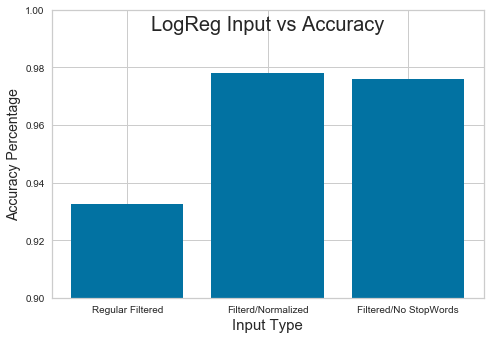

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(.9, 1)
x = ["Regular Filtered", "Filterd/Normalized", "Filtered/No StopWords"]
y = [regular_accuracy, normalized_accuracy, stopwords_accuracy]
fig.suptitle('LogReg Input vs Accuracy', fontsize=20)
plt.xlabel('Input Type', fontsize=15)
plt.ylabel('Accuracy Percentage', fontsize=14)
ax.bar(x,y)
plt.show()

ValueError: X has 10574 features per sample; expecting 10486

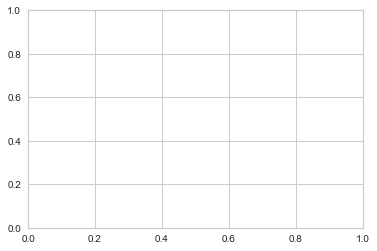

In [43]:
conf_matrix = ConfusionMatrix(LogReg, cmapstring='YlOrRd', percent=True)
conf_matrix.fit(train_count_vector, y_train)
conf_matrix.score(test_count_vector, y_test)